## Introduction to Data Science

#### University of Redlands - DATA 101
#### Prof: Joanna Bieri [joanna_bieri@redlands.edu](mailto:joanna_bieri@redlands.edu)
#### [Class Website: data101.joannabieri.com](https://joannabieri.com/data101.html)

---------------------------------------
# Homework Day 17
---------------------------------------

GOALS:

1. Do a full analysis and model of Bike Rentals in DC
2. Engage in EDA plus predictive modeling and interpretation

----------------------------------------------------------

This homework has **12 Problems** and **2 Challenge Problems**

In [187]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'

from itables import show

# This stops a few warning messages from showing
pd.options.mode.chained_assignment = None 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Machine Learning Packages
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression 

## Data Bike Sharing

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic.
Through these systems, user is able to easily rent a bike from a particular position and return back at another position.
Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles.
Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research.
Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems.
This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city.
Hence, it is expected that most of important events in the city could be detected via monitoring these data.

Source: [UCI Machine Learning Repository - Bike Sharing Dataset](http://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset)

The data include daily bike rental counts (by members and casual users) of Capital Bikeshare in Washington, DC in 2011 and 2012 as well as weather information on these days.
The original data sources are <http://capitalbikeshare.com/system-data> and <http://www.freemeteo.com>.

In [189]:
# Load the Data
#file_location = 'https://joannabieri.com/introdatascience/data/bikeshare-day.csv'
file_location = 'data/bikeshare-day.csv'
DF_raw = pd.read_csv(file_location)

In [190]:
show(DF_raw)

## Data wrangling and Preprocessing

First - check out the codebook to make sure you understand the variables in the data set:

[UCI Machine Learning Repository - Bike Sharing Dataset](http://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset)

1.  Recode the season variable to be categorical with meaningful level names as outlined in the codebook, with spring as the baseline level.

2.  Recode the binary variables holiday and workingday to categorical with levels no (0) and yes (1), with no as the baseline level.

3.  Recode the yr variable to be categorical with levels 2011 and 2012, with 2011 as the baseline level.

4.  Recode the `weathersit` variable as 1 - clear, 2 - mist, 3 - light precipitation, and 4 - heavy precipitation.

------------------------------------
**NOTE** Remember recode means to change the data to a new format. Here we are changing numbers into strings. Then we want to tell Python which order the categories are in. Here is the code for the first one:

    DF['season'].replace({1:'winter', 2:'spring', 3:'summer', 4:'fall'},inplace=True)
    DF['season'] = pd.Categorical(DF['season'], categories=['spring','summer','fall','winter'], ordered=True)
    
------------------------------------

5.  Calculate raw temperature, feeling temperature, humidity, and windspeed as their values given in the dataset multiplied by the maximum raw values stated in the codebook for each variable.  Here, instead of writing over the existing variables, create new ones (new columns) with concise but informative names.

------------------------------------
**Example calculate raw temperature**

How do I do this? The codebook (page 2) says that temperature was calculated using 

    (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39

putting this into an equation:

$$t_{data} = (t-t_{min})/(t_{max}-t_{min})$$

where $t_{min}=-8$, $t_{max}=+39$. So I can solve for temperature $t$

$$ t = t_{data}*(t_{max} - t_{min}) + t_{min} $$

or in code

    DF['raw_temp'] = DF['temp']*(39-(-8)) + (-8)

-----------------------------------------------

6. Look at what is in your final data frame. Do your values make sense for temperature, humidity, and windspeed?

7.  Data Sanity Check - check that the sum of `casual` and `registered` adds up to `cnt` for each record.
    **Hint:** One way of doing this is to create a new column that adds up the `casual` and `registered` columns. Then create a mask to see if your new column is equal to the count 'cnt' column. If you sum(mask) it will add up the number of Trues in the mask.
    But this is only one way, you might come up with another.

In [192]:
# Get a copy of the data
DF = DF_raw.copy()
DF

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [193]:
# Recode the season
DF['season'].replace({1:'winter', 2:'spring', 3:'summer', 4:'fall'},inplace=True)
DF['season'] = pd.Categorical(DF['season'], categories=['spring','summer','fall','winter'], ordered=True)

In [194]:
# Recode the others
DF['holiday'].replace({0:'no', 1:'yes'},inplace=True)
DF['holiday'] = pd.Categorical(DF['holiday'], categories=['no','yes'], ordered=True)

DF['workingday'].replace({0:'no', 1:'yes'},inplace=True)
DF['workingday'] = pd.Categorical(DF['workingday'], categories=['no','yes'], ordered=True)

DF['yr'].replace({0:'2011', 1:'2012'},inplace=True)
DF['yr'] = pd.Categorical(DF['yr'], categories=['2011','2012'], ordered=True)

DF['weathersit'].replace({1:'clear', 2:'mist', 3:'light precipitation', 4:'heavy precipitation'},inplace=True)
DF['weathersit'] = pd.Categorical(DF['weathersit'], categories=['clear','mist','light precipitation','heavy precipitation'], ordered=True)

In [195]:
# Calculate the raw temperature
DF['raw_temp'] = DF['temp']*(39-(-8)) + (-8)

In [196]:
# Calculate the other raw values
DF['feeling_temp'] = DF['atemp']*(50-(-16)) + (-16)
DF['raw_hum'] = DF['hum']*100
DF['raw_windspeed'] = DF['windspeed']*67
DF

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,raw_temp,feeling_temp,raw_hum,raw_windspeed
0,1,2011-01-01,winter,2011,1,no,6,no,mist,0.344167,0.363625,0.805833,0.160446,331,654,985,8.175849,7.999250,80.5833,10.749882
1,2,2011-01-02,winter,2011,1,no,0,no,mist,0.363478,0.353739,0.696087,0.248539,131,670,801,9.083466,7.346774,69.6087,16.652113
2,3,2011-01-03,winter,2011,1,no,1,yes,clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349,1.229108,-3.499270,43.7273,16.636703
3,4,2011-01-04,winter,2011,1,no,2,yes,clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562,1.400000,-1.999948,59.0435,10.739832
4,5,2011-01-05,winter,2011,1,no,3,yes,clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600,2.666979,-0.868180,43.6957,12.522300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,winter,2012,12,no,4,yes,mist,0.254167,0.226642,0.652917,0.350133,247,1867,2114,3.945849,-1.041628,65.2917,23.458911
727,728,2012-12-28,winter,2012,12,no,5,yes,mist,0.253333,0.255046,0.590000,0.155471,644,2451,3095,3.906651,0.833036,59.0000,10.416557
728,729,2012-12-29,winter,2012,12,no,6,no,mist,0.253333,0.242400,0.752917,0.124383,159,1182,1341,3.906651,-0.001600,75.2917,8.333661
729,730,2012-12-30,winter,2012,12,no,0,no,clear,0.255833,0.231700,0.483333,0.350754,364,1432,1796,4.024151,-0.707800,48.3333,23.500518


In [197]:
# Check the sum
print(DF['casual'].sum() + DF['registered'].sum())
print(DF['cnt'].sum())

3292679
3292679


## Exploratory data analysis

8.  Recreate the following visualization, and interpret it in context of the data. **Hint:** You will need to use one of the variables you created above. The temperature plotted is the feeling temperature. To get a nice title on the color bar I used:

        fig.update_layout(coloraxis_colorbar_title='Feeling Temperature (C)')

![Bike Rental](images/BikeRentalTemp.jpg)

9.  Create a visualization displaying the relationship between bike rentals and season. Interpret the plot in context of the data.

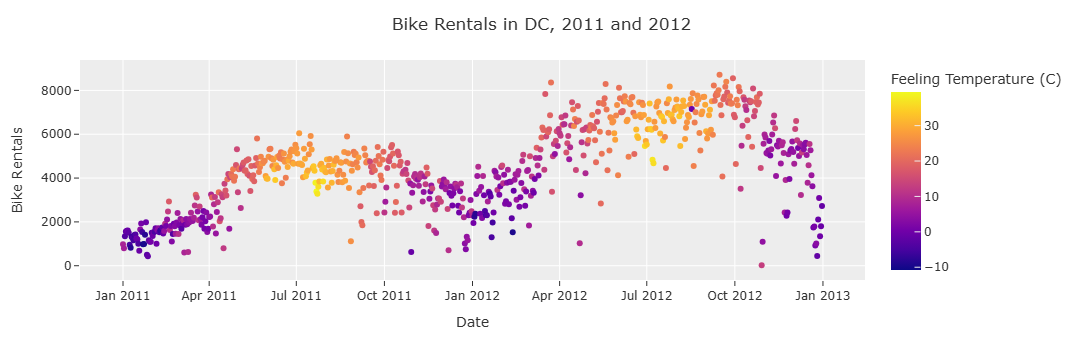

In [199]:
# Visualization - recreate the graph
fig = px.scatter(DF,
                 x='dteday',
                 y='cnt',
                 color='feeling_temp')

fig.update_layout(title='Bike Rentals in DC, 2011 and 2012',
                  title_x=0.5,
                  xaxis_title='Date',
                  yaxis_title='Bike Rentals',
                  coloraxis_colorbar_title='Feeling Temperature (C)',
                  template='ggplot2')

fig.show()

**The graph displays how the number of bike rentals starts low in January, increases to around July, decreases back to January, and repeats over the two years. The color suggests bike rentals are more frequent for warmer temperatures compared to colder ones. This aligns with temperature patterns over seasons and months, so bike rentals are more frequent in the summer, when it is warmer, and less frequent in the winter, when it is colder.**

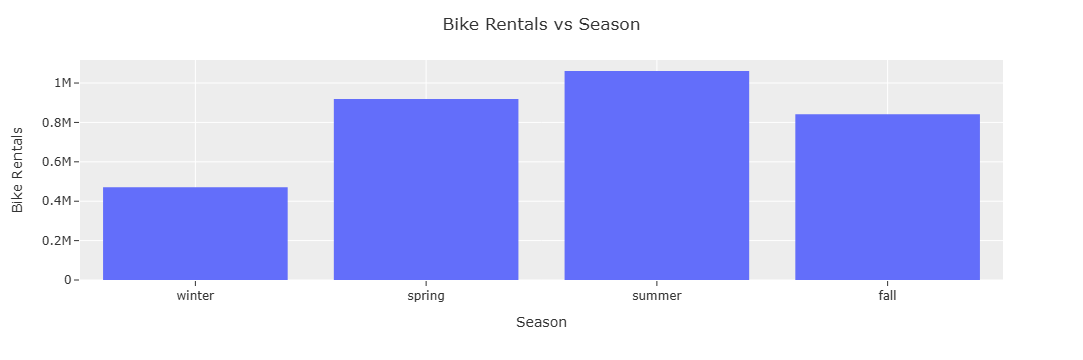

In [201]:
# Visualization - do your own thing
fig = px.histogram(DF,
                 x='season',
                 y='cnt')

fig.update_layout(template="ggplot2",
                  title="Bike Rentals vs Season",
                  title_x=0.5,
                  xaxis_title='Season',
                  yaxis_title='Bike Rentals')

fig.show()

In [202]:
DF['season'].value_counts()

season
summer    188
spring    184
winter    181
fall      178
Name: count, dtype: int64

**It appears that there are typically the most amount of bike rentals in summer, followed by spring, then fall, and finally winter. Winter appears to have a much lower frequency compared to the other seasons. Furthermore, we can use a histogram to analyze the relationship between season and bike rentals because there are a similar number of observations in each season, so a skewed number of observations is less likely to have great influence on the results.**

## Modeling

10.  Fit a linear model predicting total daily bike rentals from daily temperature.
    Write the linear model, interpret the slope and the intercept in context of the data, and determine and interpret the $R^2$.

10. Fit another linear model predicting total daily bike rentals from daily feeling temperature.
    Write the linear model, interpret the slope and the intercept in context of the data, and determine and interpret the $R^2$.
    Is temperature or feeling temperature a better predictor of bike rentals?
    Explain your reasoning.

11. Fit a model predicting total daily bike rentals from workingday, temperature (raw and feeling), holiday, and an interaction term between holiday and raw temperature (raw_temp * holiday_no). Use the **.get_dummies()** function to get dummy variables for the categorical data. Plot the residual of your prediction.

NOTE - in this case you won't be able to directly 2D scatter plot the results because you have too many variables. But you can still think of a way to visualize this fit...eg 3D scatter with facets or colors.


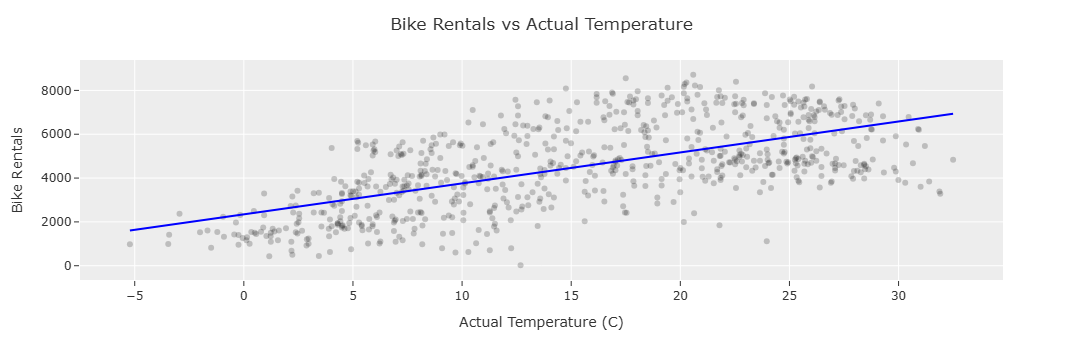

[141.2917021]
2344.975735803638
0.3937487313729242


In [205]:
# Linear model cnt vs raw_temp
X = DF['raw_temp'].values.reshape(-1,1)
y = DF['cnt'].values
LM = LinearRegression()
LM.fit(X, y)

fig = px.scatter(DF,
                 x='raw_temp',
                 y='cnt',
                 color_discrete_sequence=['black'],
                 opacity=0.2)

fig.update_layout(template="ggplot2",
                  title='Bike Rentals vs Actual Temperature',
                  title_x=0.5,
                  xaxis_title='Actual Temperature (C)',
                  yaxis_title='Bike Rentals')

DF_model = pd.DataFrame()
DF_model['w'] = DF['raw_temp']
DF_model['y'] = LM.coef_*DF_model['w']+LM.intercept_
DF_model = DF_model.sort_values('w')

fig.add_trace(
    px.line(DF_model, x='w', y='y',color_discrete_sequence=['blue']).data[0]
)

fig.show()

print(LM.coef_)
print(LM.intercept_)
print(LM.score(X,y))

$$(bikerentals) = 141.29*(actualtemperature) + 2344.98$$

**The slope is arouned 141.29, which means on average, the number of bike rentals increases by 141.29 for every degree increase in temperature. The intercept is around 2344.98, which means, on average, the numbert of bike rentals is 2344.98 when the temperature is 0. This is not an extrapolation. $R^2$ is around 0.3937 which means the model is only somewhat predictive.**

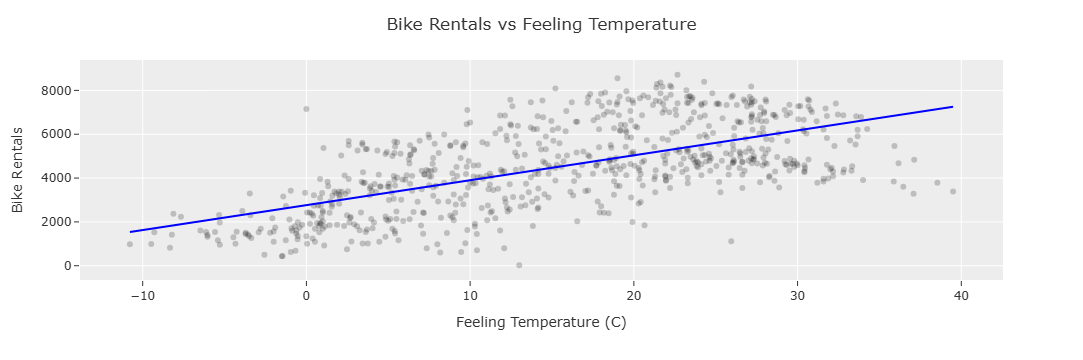

[113.66415075]
2764.450393102493
0.39824391752613686


In [208]:
# Redo - linear model cnt vs feeling_temp
X = DF['feeling_temp'].values.reshape(-1,1)
y = DF['cnt'].values
LM = LinearRegression()
LM.fit(X, y)

fig = px.scatter(DF,
                 x='feeling_temp',
                 y='cnt',
                 color_discrete_sequence=['black'],
                 opacity=0.2)

fig.update_layout(template="ggplot2",
                  title='Bike Rentals vs Feeling Temperature',
                  title_x=0.5,
                  xaxis_title='Feeling Temperature (C)',
                  yaxis_title='Bike Rentals')

DF_model = pd.DataFrame()
DF_model['w'] = DF['feeling_temp']
DF_model['y'] = LM.coef_*DF_model['w']+LM.intercept_
DF_model = DF_model.sort_values('w')

fig.add_trace(
    px.line(DF_model, x='w', y='y',color_discrete_sequence=['blue']).data[0]
)

fig.show()

print(LM.coef_)
print(LM.intercept_)
print(LM.score(X,y))

$$(bikerentals) = 113.66*(feelingtemperature) + 2764.45$$

**The slope is arouned 113.66, which means on average, the number of bike rentals increases by 113.66 for every degree increase in feeling temperature. The intercept is around 2764.45, which means, on average, the numbert of bike rentals is 2764.45 when the feeling temperature is 0. This is not an extrapolation. $R^2$ is around 0.3982 which means the model is only somewhat predictive.**

**Feeling temperature appears to be a better predictor of bike rentals because it has a greater $R^2$ value (0.3982 compared to 0.3937). This seems to make sense because how the temperature feels to people logically would better indicate their likelihood to bike outside.**

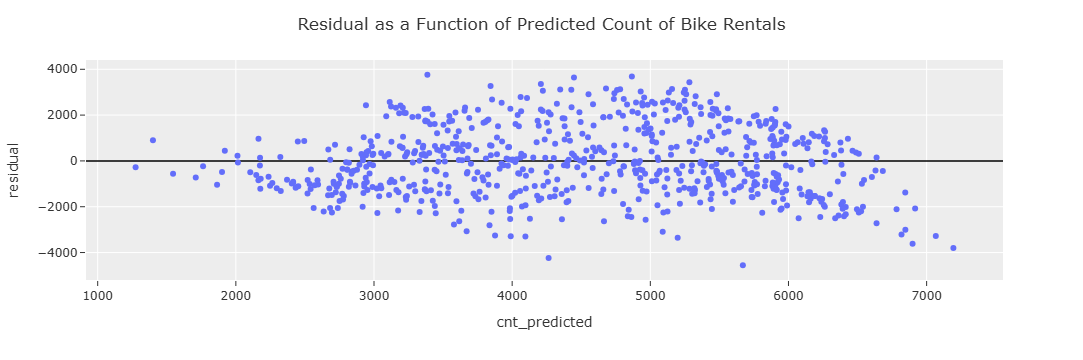

[  60.90934891   92.72466268  506.82651319 -506.82651319  -36.1744178
   36.1744178   -36.2775291 ]
2203.070346055079
0.401852196051261


In [212]:
# Multivariable model with dummies - cnt from workingday, temperature (raw and feeling), holiday, and an interaction term
DF = pd.get_dummies(DF, columns = ['workingday','holiday'], dtype=float)
DF['int_raw_temp_holiday_no'] = DF['raw_temp'] * DF['holiday_no']
my_cols = ['raw_temp','feeling_temp','holiday_no','holiday_yes','workingday_no','workingday_yes','int_raw_temp_holiday_no']
X = DF[my_cols].values.reshape(-1,len(my_cols))
y = DF['cnt'].values
LM = LinearRegression()
LM.fit(X, y)

# Residuals
DF['cnt_predicted'] = LM.predict(X)
DF['residual'] = DF['cnt'] - DF['cnt_predicted']

fig = px.scatter(DF,x='cnt_predicted',y='residual')

fig.update_layout(
    yaxis={'zeroline':True, 'zerolinewidth':1.5, 'zerolinecolor':"black"})

fig.update_layout(template="ggplot2",
                  title='Residual as a Function of Predicted Count of Bike Rentals',
                  title_x=0.5)

fig.show()

print(LM.coef_)
print(LM.intercept_)
print(LM.score(X,y))

**The graph of the residual as a function of the prediction count of bike rentals appears to be mostly randomly scattered, although at the right end, it almost appears to be a negative quadratic graph.**

### Interpretation

$$y = 2203.07 + 60.91*(raw temp) + 92.72*(feeling temp) + 506.83*(holiday no) - 506.83(holiday yes) - 36.17*(workingday no) + 36.17*(workinday yes) - 36.28(raw temp * holiday no)$$

**There are 4 intercepts when the raw temperature and feeling temperature are 0, which reveal the number of bike rentals. When it is not a holiday and is not a working day, the intercept is 2673.73 bike rentals. When it is not a holiday and is a working day, the intercept is 2746.07 bike rentals. When it is a holiday and is not a working day, the intercept is 660.07 bike rentals. When it is a holiday and is a working day, the intercept is 1732.41 bike rentals. $R^2$ is around 0.4019 which means the model is only somewhat predictive. The slopes tell us a few things. All else held constant, on average, the number of bike rentals increase by 60.91 for every degree increase of raw temperature when it is a holiday. All else held constant, on average, the number of bike rentals increase by 24.63 for every degree increase of raw temperature when it is not a holiday. All else held constant, on average, the number of bike rentals increase by 92.72 for every degree increase of feeling temperature. All else held constant, on average, non-holidays have 1013.66 more bike rentals than holidays. All else held constant, on average, working days have 72.34 more bike rentals than non-working days.**

In [216]:
# Calculate the adjusted R^2 
Rsq =  0.401852196051261
k = len(my_cols)
n = len(DF)
AdjRsq = 1-((1-Rsq)*(n-1)/(n-k-1))

print(AdjRsq)

0.3960610001624074


**Challenge** Fit a model predicting total daily bike rentals from season, year, whether the day is holiday or not, whether the day is a workingday or not, the weather category, temperature, feeling temperature, humidity, and windspeed, as well as the interaction between feeling temperature and holiday.

**IMPORTANT** When you use get dummies you are going to have a lot of variables! I always look at the resulting columns and copy and paste, then count how many variables I have.

Record **adjusted** $R^2$ of the model and discuss: Is it a better model than the ones above?

NOTE - you will not be able to plot the prediction, because you have too many dimensions in the data, but you can still plot the residual!


**Interpretation**

**Challenge** Write down the linear models for holidays and non-holidays. Use the coefficients and intercepts from your multivariable model above, you might want to do some algebra to simplify. Remember we are comparing holiday to non-holiday **all else held constant**

- Is the slope of temperature the same or different for these two models?
- How about the slope for feeling temperature?
- Why or why not?

- Interpret the intercept.
- If the intercept is different for holidays and non-holidays, make sure to interpret both.
